# Proyecto del Día 9: Consulta de Temperaturas Interactivo por Ciudad y Mes

## Objetivo

El proyecto propuesto consistirá en la creación de un programa interactivo para la visualización de datos meteorológicos. Este programa permitirá a los usuarios visualizar los registros climáticos eligiendo el lugar y el més. El objetivo es aplicar los conceptos de creación de gráficos, personalización de estilos y combinarlo con las habilidades de desarrollo de programas con Python.

## Consigna

1. **Cargar un DataFrame** con los datos meteorológicos provistos en el archivo descargable de esta lección.
2. Asegúrate de que las **fechas** estén en el **formato correcto** para su manipulación posterior.
3. Crea un programa (una función o un conjunto de funciones) que le pida al usuario que seleccione una **ciudad** de la lista de ciudades disponibles en nuestro DataFrame, y un **mes** del año.
4. Muéstrale al usuario un gráfico que muestre las temperaturas mínimas y máximas que se registraron en la ciudad elegida durante el mes elegido.
5. El programa debe preguntarle al usuario si desea seguir haciendo consultas o no.

**¡Mucha suerte!**

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
ruta = ('/Users/alejandrobueno/Documents/WWW/cursos,etc/Python/PythonTOTAL_DataScience/Datos_meteo_arg_2023.csv')

In [116]:
df = pd.read_csv(ruta)
df

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,1/1/2023,Buenos Aires,27,18,0.0,22.7,68.8
1,1/1/2023,Cordoba,35,18,0.0,33.8,61.7
2,1/1/2023,Rosario,23,21,0.0,10.6,80.0
3,1/1/2023,Mendoza,35,21,0.0,23.8,76.8
4,1/1/2023,Tucuman,36,18,17.2,25.7,54.9
...,...,...,...,...,...,...,...
1820,31/12/2023,Buenos Aires,15,12,0.0,17.9,49.2
1821,31/12/2023,Cordoba,15,7,0.0,17.8,62.4
1822,31/12/2023,Rosario,14,8,0.0,38.2,31.2
1823,31/12/2023,Mendoza,13,9,84.8,27.6,35.3


In [118]:
df.info()
df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fecha                 1825 non-null   object 
 1   Ciudad                1825 non-null   object 
 2   Temperatura Maxima    1825 non-null   int64  
 3   Temperatura Minima    1825 non-null   int64  
 4   Precipitacion         1825 non-null   float64
 5   Velocidad del Viento  1825 non-null   float64
 6   Humedad Relativa      1825 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 99.9+ KB


,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,1/1/2023,Buenos Aires,27,18,0.0,22.7,68.8
1,1/1/2023,Cordoba,35,18,0.0,33.8,61.7
2,1/1/2023,Rosario,23,21,0.0,10.6,80.0
3,1/1/2023,Mendoza,35,21,0.0,23.8,76.8
4,1/1/2023,Tucuman,36,18,17.2,25.7,54.9
...,...,...,...,...,...,...,...
1820,31/12/2023,Buenos Aires,15,12,0.0,17.9,49.2
1821,31/12/2023,Cordoba,15,7,0.0,17.8,62.4
1822,31/12/2023,Rosario,14,8,0.0,38.2,31.2
1823,31/12/2023,Mendoza,13,9,84.8,27.6,35.3


In [120]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df.dtypes

Fecha                   datetime64[ns]
Ciudad                          object
Temperatura Maxima               int64
Temperatura Minima               int64
Precipitacion                  float64
Velocidad del Viento           float64
Humedad Relativa               float64
dtype: object

In [122]:
lista_ciudades = []

for ciudad in df["Ciudad"]:
    if ciudad not in lista_ciudades:
        lista_ciudades.append(ciudad)
lista_ciudades

['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']

In [124]:
dict_meses = {
    1:'Enero',
    2:'Febrero',
    3:'Marzo',
    4:'Abril',
    5:'Mayo',
    6:'Junio',
    7:'Julio',
    8:'Agosto',
    9:'Septiembre',
    10:'Octubre',
    11:'Noviembre',
    12:'Diciembre'
}

In [140]:
def consultar_temperaturas():
    while True:
        #pedir ciudad
        print("\nCiudades disponibles: ", lista_ciudades)
        ciudad_elegida = input("Elige una ciudad").title()
        
        #pedir mes
        mes_elegido = int(input("Elige un mes del 1 al 12"))
        
        #validar datos
        if ciudad_elegida not in lista_ciudades or mes_elegido not in range(1,13):
            print("Ciudad o mes no válido. Intentalo de nuevo.")
            continue
                  
        #consultar dataframe
        datos_ciudad_mes = df[(df["Ciudad"] == ciudad_elegida) & (df["Fecha"].dt.month == mes_elegido)]
            
        #crear gráfico
        plt.figure(figsize=(20, 6))
        plt.plot(datos_ciudad_mes['Fecha'], datos_ciudad_mes['Temperatura Maxima'], label="Máxima", color="red")
        plt.plot(datos_ciudad_mes['Fecha'], datos_ciudad_mes['Temperatura Minima'], label="Mínima", color="blue")
        plt.title(f'Temperaturas máximas y mínimas de {ciudad_elegida} en el mes de {dict_meses[mes_elegido]}')
        plt.xlabel('Fechas')
        plt.ylabel('Temperaturas')
        plt.legend()
        plt.xticks(rotation=45)
        plt.show()

        #preguntar usuario
        otra_consulta = input("Pulsa cualquier botón para continuar o pulsa 0 para finalizar.")
        if otra_consulta == "0":
            break


Ciudades disponibles:  ['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']


Elige una ciudad cordoba
Elige un mes del 1 al 12 1


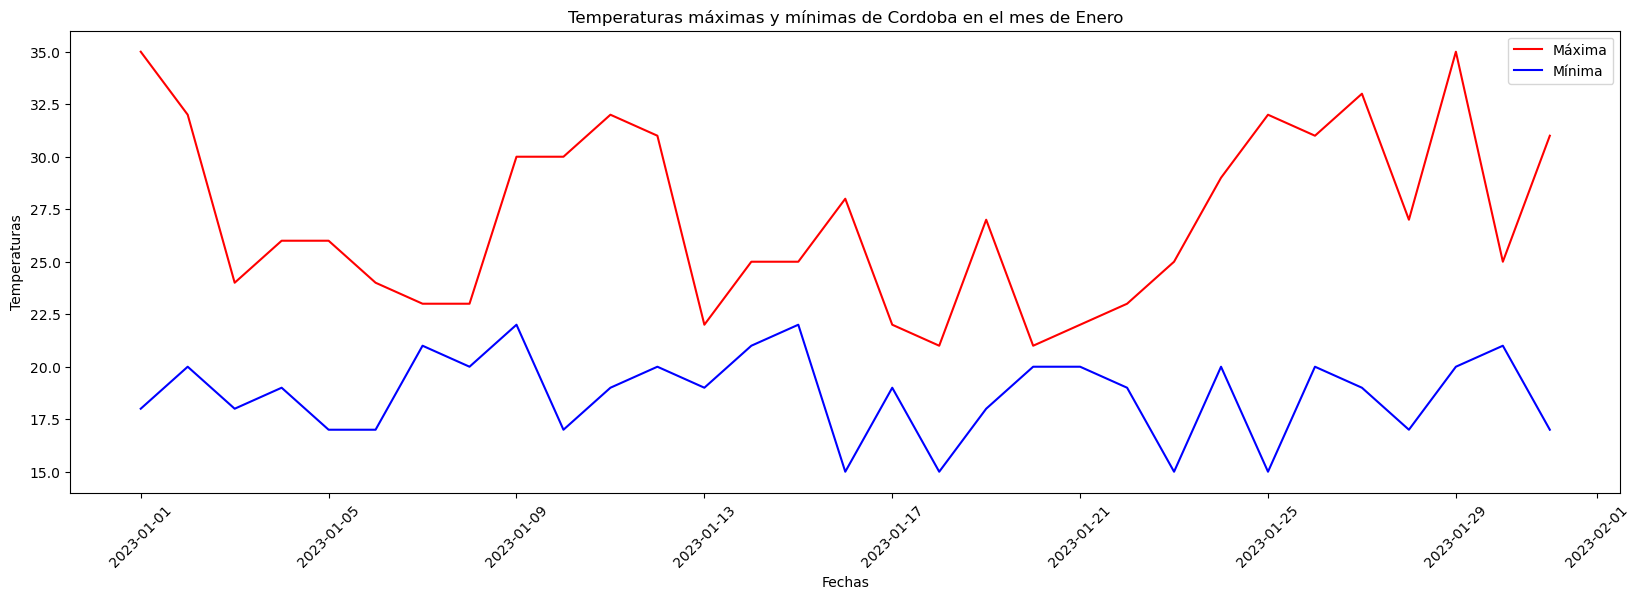

Pulsa cualquier botón para continuar o pulsa 0 para finalizar. h



Ciudades disponibles:  ['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']


Elige una ciudad buenos aires
Elige un mes del 1 al 12 6


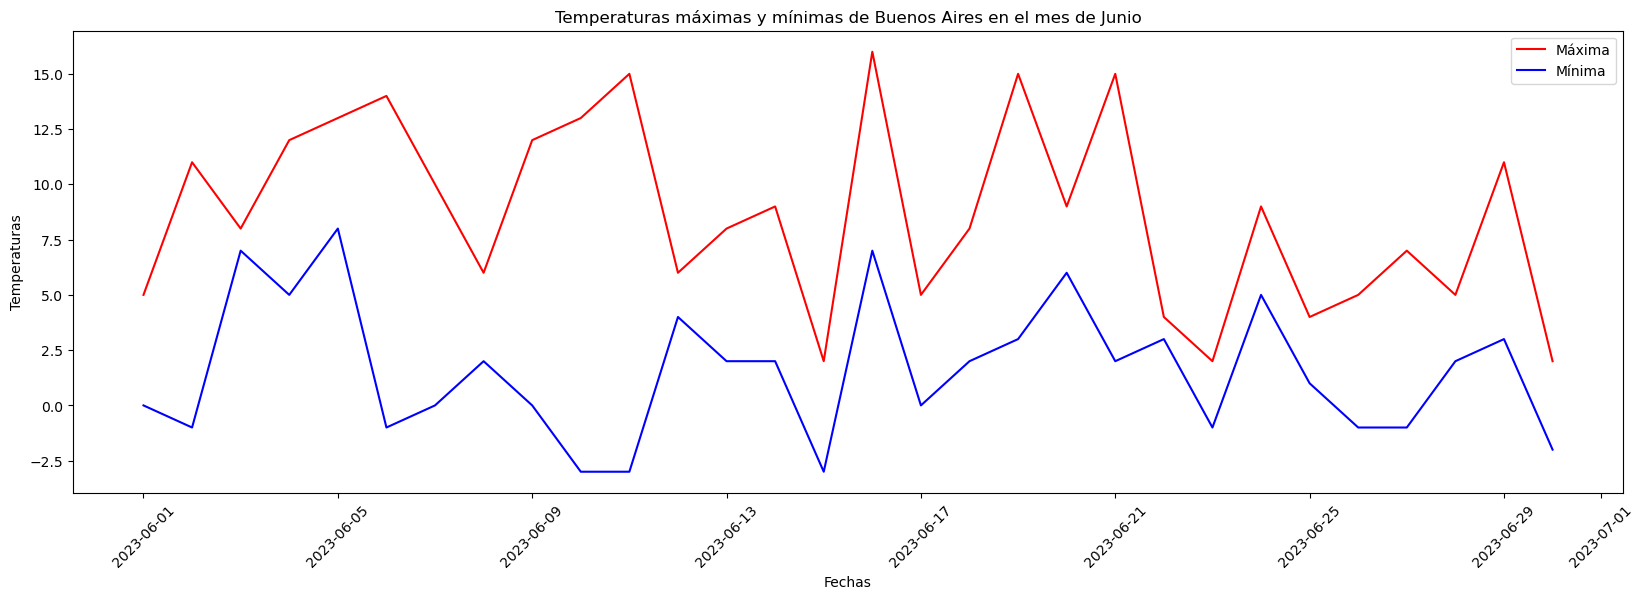

Pulsa cualquier botón para continuar o pulsa 0 para finalizar. 0


In [142]:
consultar_temperaturas()